In [4]:
%use bash
wget -O jq https://github.com/stedolan/jq/releases/latest/download/jq-linux64
chmod +x jq

--2025-06-03 16:52:12--  https://github.com/stedolan/jq/releases/latest/download/jq-linux64
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/jqlang/jq/releases/latest/download/jq-linux64 [following]
--2025-06-03 16:52:12--  https://github.com/jqlang/jq/releases/latest/download/jq-linux64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jqlang/jq/releases/download/jq-1.8.0/jq-linux64 [following]
--2025-06-03 16:52:12--  https://github.com/jqlang/jq/releases/download/jq-1.8.0/jq-linux64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/5101141/656b168e-a425-4028-87bb-947aca82a3f1?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Cre

In [17]:
%use bash
# Set output file name
OUTPUT_FILE="beer_places_poland.json"

read -r -d '' QUERY << EOM
[out:json][timeout:1800];
area["ISO3166-1"="PL"]["admin_level"="2"]->.searchArea;
(
  nwr(area.searchArea)["amenity"="pub"];
  nwr(area.searchArea)["amenity"="bar"];
  nwr(area.searchArea)["craft"="brewery"];
  nwr(area.searchArea)["cuisine"~"beer"];
);
out body;
>;
out skel qt;
EOM

ENCODED_QUERY=$(echo "$QUERY" | ./jq -sRr @uri)
curl -o "$OUTPUT_FILE" "https://overpass-api.de/api/interpreter?data=$ENCODED_QUERY"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1761k    0 1761k    0     0  51777      0 --:--:--  0:00:34 --:--:--  491k


In [9]:
%use bash
npm install osmtogeojson

(################⠂⠂) ⠇ reify:minimist: http fetch GET 200 https://registry.npmjnpm WARN deprecated @xmldom/xmldom@0.8.3: this version has critical issues, please update to the latest version
(##################) ⠼ reify:htmlparser2: http fetch GET 200 https://registry.ndules/@xmldo
added 35 packages, and audited 36 packages in 3s

4 packages are looking for funding
  run `npm fund` for details

2 critical severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.
npm notice 
npm notice New major version of npm available! 8.19.2 -> 11.4.1
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.4.1
npm notice Run npm install -g npm@11.4.1 to update!
npm notice 



In [ ]:
%use javascript
const fs = require("fs");
const osmtogeojson = require("osmtogeojson");

const osmData = JSON.parse(fs.readFileSync("beer_places_poland.json"));
const geojson = osmtogeojson(osmData);
fs.writeFileSync("beer_places_poland.geojson", JSON.stringify(geojson, null, 2));
console.log("Converted to GeoJSON: beer_places.geojson");


✅ Converted to GeoJSON: beer_places.geojson


In [ ]:
%use python3
pip install geopandas geopy tqdm shapely numpy==1.23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 2.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 3.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 3.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use update

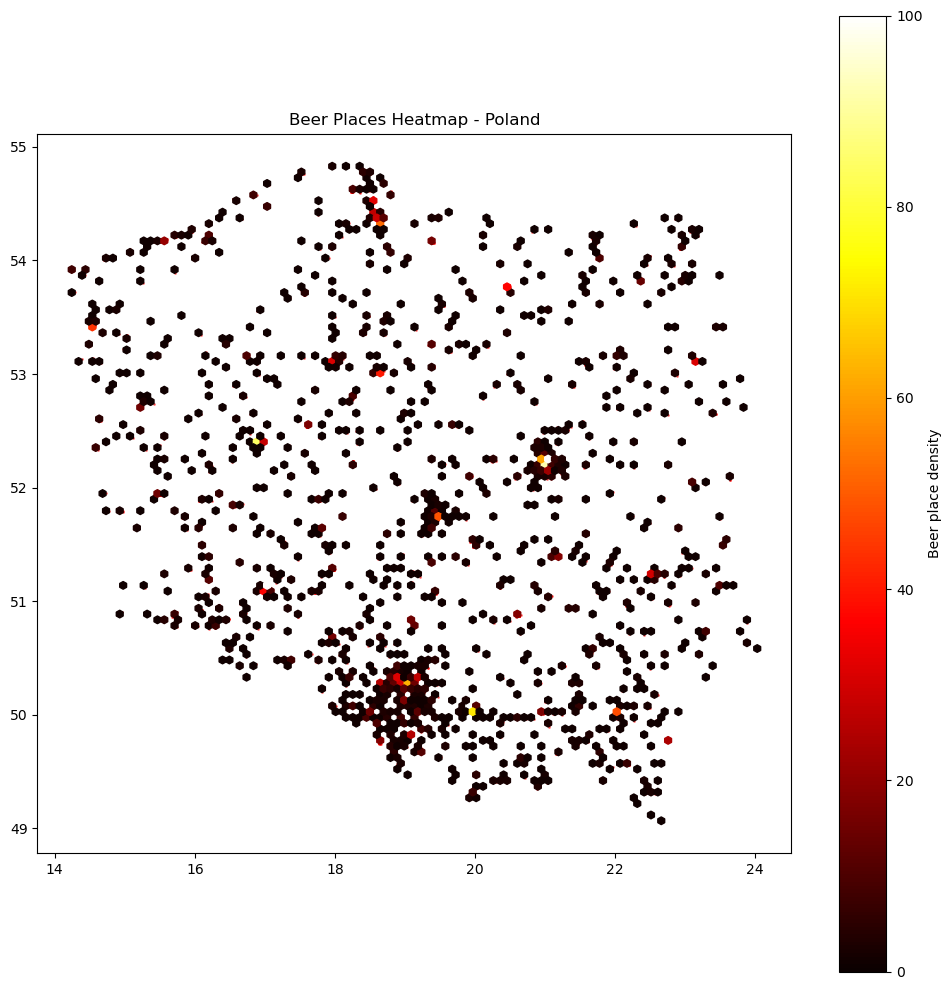

In [18]:
%use python3
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# gdf = gpd.read_file("beer_places_world.geojson")
gdf = gpd.read_file("beer_places_poland.geojson")

gdf = gdf[gdf.geometry.type == 'Point']


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Beer Places Heatmap - Poland")

gdf.plot(ax=ax, alpha=0.5, markersize=1, color='red')

x = gdf.geometry.x
y = gdf.geometry.y
hb = ax.hexbin(x, y, gridsize=100, cmap="hot", mincnt=1, vmin=0, vmax=100)

cb = fig.colorbar(hb, ax=ax, label="Beer place density")
plt.tight_layout()
plt.savefig("beer_places_heatmap.png", dpi=600)
plt.show()




In [19]:
%use bash
wget https://simplemaps.com/static/data/country-cities/pl/pl.csv -O city_population_poland.csv


--2025-06-04 17:48:23--  https://simplemaps.com/static/data/country-cities/pl/pl.csv
Resolving simplemaps.com (simplemaps.com)... 104.26.13.95, 172.67.71.113, 104.26.12.95, ...
Connecting to simplemaps.com (simplemaps.com)|104.26.13.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12433 (12K) [text/csv]
Saving to: ‘city_population_poland.csv’

city_population_pol 100%[===================>]  12.14K  --.-KB/s    in 0.02s   

2025-06-04 17:48:23 (757 KB/s) - ‘city_population_poland.csv’ saved [12433/12433]



In [21]:
%use python3
print(gdf.columns)

Index(['addr:city', 'addr:city:en', 'addr:city:simc', 'addr:country',
       'addr:district', 'addr:floor', 'addr:full', 'addr:housenumber',
       'addr:place', 'addr:postcode',
       ...
       'wine', 'year', 'id', 'BytomGIS:id', 'access', 'access:covid19',
       'addr:door', 'addr:housename', 'airside', 'geometry'],
      dtype='object', length=301)


🏆 Top 10 Cities by Beer Places per 100,000 inhabitants:
             city  beer_places  population  beer_per_100k
30        koszyce            1        2207      45.310376
79  wiśniowa góra            1        2569      38.925652
3        brodnica            8       28536      28.034763
78      wejherowo            9       47357      19.004582
66          sopot            6       32962      18.202779
31      kołobrzeg            8       44340      18.042400
72         tarnów           16      106259      15.057548
61          rypin            2       15832      12.632643
73          tczew            7       57990      12.071047
80        wrocław           79      672929      11.739723


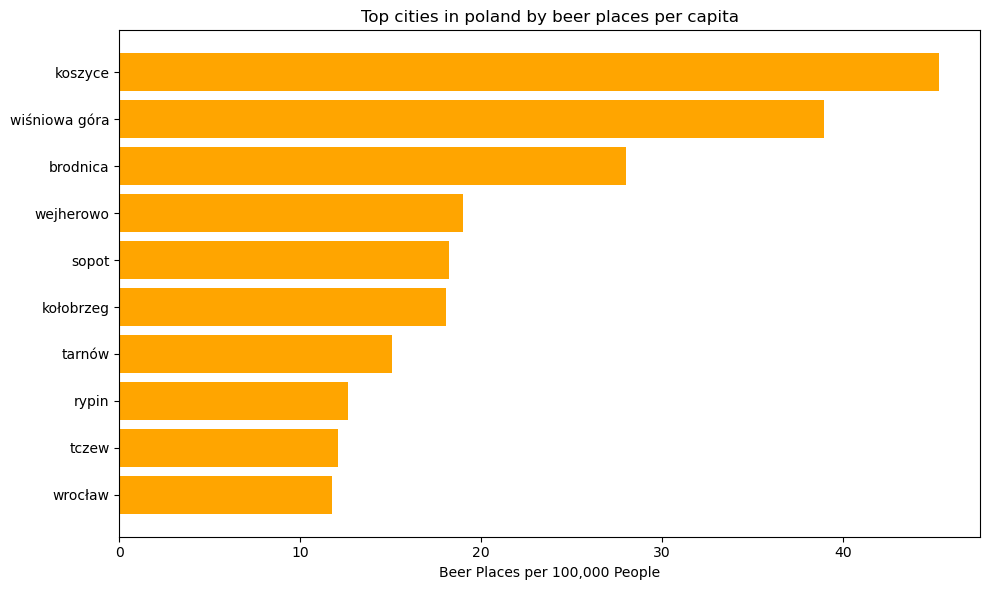

In [32]:
%use python3
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoJSON
gdf = gpd.read_file("beer_places_poland.geojson")
gdf = gdf[gdf.geometry.type == 'Point']
gdf = gdf.dropna(subset=['addr:city'])

# Rename for consistency
gdf = gdf.rename(columns={'addr:city': 'city'})
gdf['city'] = gdf['city'].str.lower()

# Count beer places per city
beer_counts = gdf.groupby('city').size().reset_index(name='beer_places')

population_df = pd.read_csv("city_population_poland.csv")
population_df['city'] = population_df['city'].str.lower()

merged = pd.merge(beer_counts, population_df, on='city', how='inner')
merged['beer_per_100k'] = (merged['beer_places'] / merged['population']) * 100000

# Top 10 by per capita
top = merged.sort_values('beer_per_100k', ascending=False).head(10)

# Print results
print("🏆 Top 10 Cities by Beer Places per 100,000 inhabitants:")
print(top[['city', 'beer_places', 'population', 'beer_per_100k']])
 
 
# Plot
plt.figure(figsize=(10, 6))
plt.barh(top['city'], top['beer_per_100k'], color='orange')
plt.xlabel('Beer Places per 100,000 People')
plt.title('Top cities in poland by beer places per capita')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("beer_cities.png", dpi=600)
plt.show()
